# Loan ML

In this notebook we practice some classification algorithms.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-02-12 19:11:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-02-12 19:11:54 (12.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

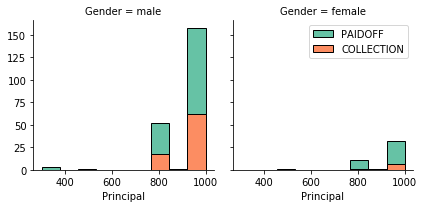

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

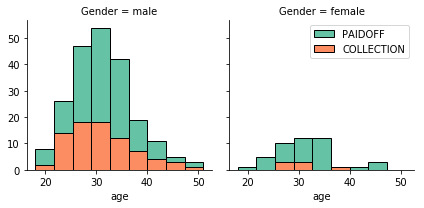

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

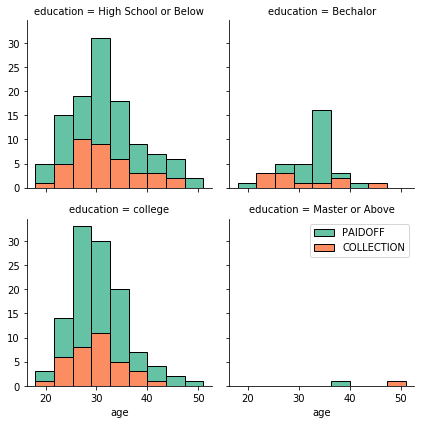

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

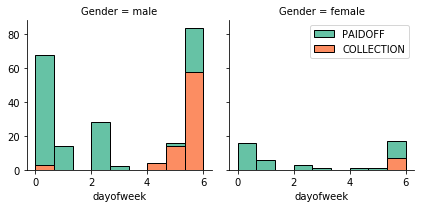

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

We will use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


# K Nearest Neighbor(KNN)

#### Train Test Split (For all models):

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [23]:
result=pd.DataFrame(index=['KNN','Decision Tree','SVM','LogisticRegression'], columns=['Jaccard','F1-score','LogLoss'])
result

,Jaccard,F1-score,LogLoss
KNN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN
SVM,NaN,NaN,NaN
LogisticRegression,NaN,NaN,NaN


#### Find best k:

In [24]:
Ks = 30
jac = np.zeros((Ks-1))    ## same as accuracy_score ##
f1 = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    jac[n-1] = jaccard_similarity_score(y_test, yhat)
    f1[n-1] = metrics.f1_score(y_test, yhat, pos_label="COLLECTION")  ## COLLECTION based, we can also do that for PAIDOFF with different results ##
    

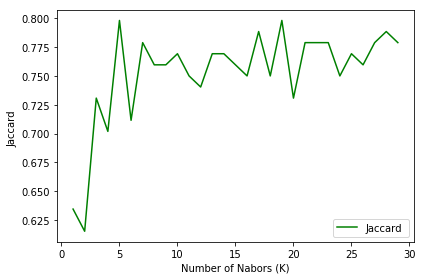

The best Jaccard was with 0.7980769230769231 with k= 5


In [25]:
plt.plot(range(1,Ks),jac,'g')
plt.legend(('Jaccard ',))
plt.ylabel('Jaccard ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best Jaccard was with", jac.max(), "with k=", jac.argmax()+1)
result.loc['KNN']['Jaccard']=jac.max()

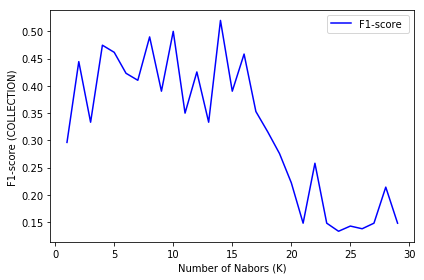

The best F1-score was with 0.52 with k= 14


In [26]:
plt.plot(range(1,Ks),f1,'b')
plt.legend(('F1-score ',))
plt.ylabel('F1-score (COLLECTION) ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best F1-score was with", f1.max(), "with k=", f1.argmax()+1)
result.loc['KNN']['F1-score']=f1.max()

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
Ks = 30
jac = np.zeros((Ks-1))    ## same as accuracy_score ##
f1 = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=Tree.predict(X_test)
    jac[n-1] = jaccard_similarity_score(y_test, yhat)
    f1[n-1] = metrics.f1_score(y_test, yhat, pos_label="COLLECTION")  ## COLLECTION based, we can also do that for PAIDOFF with different results ##
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages

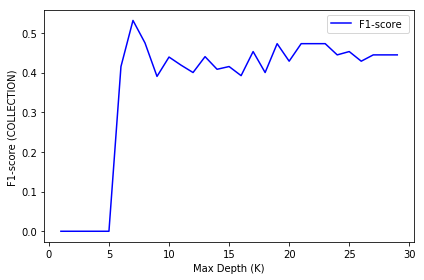

The best F1-score was with 0.53125 with k= 7


In [28]:
plt.plot(range(1,Ks),f1,'b')
plt.legend(('F1-score ',))
plt.ylabel('F1-score (COLLECTION) ')
plt.xlabel('Max Depth (K)')
plt.tight_layout()
plt.show()
print( "The best F1-score was with", f1.max(), "with k=", f1.argmax()+1)
result.loc['Decision Tree']['F1-score']=f1.max()

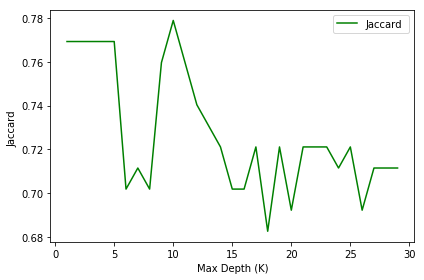

The best Jaccard was with 0.7788461538461539 with k= 10


In [29]:
plt.plot(range(1,Ks),jac,'g')
plt.legend(('Jaccard ',))
plt.ylabel('Jaccard ')
plt.xlabel('Max Depth (K)')
plt.tight_layout()
plt.show()
print( "The best Jaccard was with", jac.max(), "with k=", jac.argmax()+1)
result.loc['Decision Tree']['Jaccard']=jac.max()

# Support Vector Machine

In [30]:
from sklearn import svm
Ks = 20
jac = np.zeros((Ks-1))    ## same as accuracy_score ##
f1 = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    SVM = svm.SVC(kernel='rbf',gamma=n).fit(X_train,y_train)
    yhat=SVM.predict(X_test)
    jac[n-1] = jaccard_similarity_score(y_test, yhat)
    f1[n-1] = metrics.f1_score(y_test, yhat, pos_label="COLLECTION")  ## COLLECTION based, we can also do that for PAIDOFF with different results ##
    

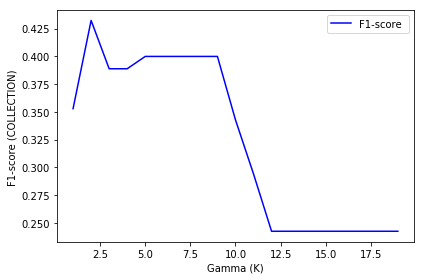

The best F1-score was with 0.43243243243243246 with k= 2


In [31]:
plt.plot(range(1,Ks),f1,'b')
plt.legend(('F1-score ',))
plt.ylabel('F1-score (COLLECTION) ')
plt.xlabel('Gamma (K)')
plt.tight_layout()
plt.show()
print( "The best F1-score was with", f1.max(), "with k=", f1.argmax()+1)
result.loc['SVM']['F1-score']=f1.max()

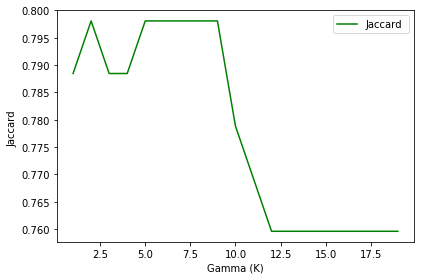

The best Jaccard was with 0.7980769230769231 with k= 2


In [32]:
plt.plot(range(1,Ks),jac,'g')
plt.legend(('Jaccard ',))
plt.ylabel('Jaccard ')
plt.xlabel('Gamma (K)')
plt.tight_layout()
plt.show()
print( "The best Jaccard was with", jac.max(), "with k=", jac.argmax()+1)
result.loc['SVM']['Jaccard']=jac.max()

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
jac = []   ## same as accuracy_score ##
f1 = []
log=[]
for n in np.linspace(0.01,20,500):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=n, solver='liblinear').fit(X_train,y_train)
    yhat=LR.predict(X_test)
    jac.append(jaccard_similarity_score(y_test, yhat))
    f1.append(metrics.f1_score(y_test, yhat, pos_label="COLLECTION"))
    log.append(log_loss(np.where(y_test=='COLLECTION',1,0), np.where(yhat=='COLLECTION',1,0)))

result.loc['LogisticRegression']['Jaccard']=max(jac)
result.loc['LogisticRegression']['F1-score']=max(f1)
result.loc['LogisticRegression']['LogLoss']=min(log)

# Model Evaluation

In [35]:
result

,Jaccard,F1-score,LogLoss
KNN,0.798077,0.52,NaN
Decision Tree,0.778846,0.53125,NaN
SVM,0.798077,0.432432,NaN
LogisticRegression,0.788462,0.3125,7.30629
